# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download The Training Dataset

Link: https://drive.google.com/file/d/1lK8GN8NItY7hAFmYEaIsYsdf2NCS3E4Q/view?usp=sharing

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [3]:
#read training data
dataset=pd.read_csv("Google_Stock_Price_Train.csv")

In [4]:
dataset

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [5]:
#3.take the necessary columns
train_set=dataset.iloc[:,1:2].values

In [6]:
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Feature Scaling

In [ ]:
#apply scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
Scaled_training=sc.fit_transform(train_set)

In [ ]:
Scaled_training

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append([i-60:i,0])
    y_train.append([i,0])

In [ ]:
#5.split the data into input and output
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(Scaled_training[i-60:i,0])
    y_train.append(Scaled_training[i,0])


In [ ]:
x_train

[array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656]),
 array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797827, 0.02379269, 0.

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(1198, 60)

In [ ]:
x_train.shape[0]

1198

In [ ]:
x_train.shape[1]

60

In [ ]:
x_train.ndim

2

In [ ]:
p=np.arange(9).reshape(3,3,1)

In [ ]:
p

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]],

       [[6],
        [7],
        [8]]])

In [ ]:
#LSTM will only accept three dimensional arrays
#p=np.arange(9).reshape(3,3,1)
x_train=np.reshape(x_train,(1198,60,1))

In [ ]:
x_train.ndim

3

# Building RNN Stacked With LSTM

# Importing Libraries

In [ ]:
#model building
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Create the model

In [ ]:
model=Sequential()

# Add layers

In [ ]:
model.add(LSTM(units=50,input_shape=(x_train.shape[1],1),return_sequences=True))

#60,1   60 inputs in 1 row
#return_sequences=True  ---we are going to add another lstm

In [ ]:
model.add(LSTM(units=50,return_sequences=True))

In [ ]:
model.add(LSTM(units=50,return_sequences=True))

In [ ]:
model.add(LSTM(units=50))

In [ ]:
#Output Layer
model.add(Dense(units=1))

# Compile the model

In [ ]:
model.compile(optimizer="adam",loss="mse")

# Fit The Model

In [ ]:
model.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
38/38 [==============================] - 11s 109ms/step - loss: 0.0397
Epoch 2/5
38/38 [==============================] - 4s 110ms/step - loss: 0.0029
Epoch 3/5
38/38 [==============================] - 4s 110ms/step - loss: 0.0023
Epoch 4/5
38/38 [==============================] - 4s 108ms/step - loss: 0.0023
Epoch 5/5
38/38 [==============================] - 4s 107ms/step - loss: 0.0021


# Test the model

# Download the test dataset

Link : https://drive.google.com/file/d/1n2JySEfz1L0h7s4cQStMxVlFDYRXtwbP/view?usp=sharing

In [ ]:
#Test the model
dataset_test=pd.read_csv("Google_Stock_Price_Test.csv")

In [ ]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [ ]:
#3.take the necessary columns
real_stock_price=dataset_test.iloc[:,1:2].values

In [ ]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [ ]:
dataset_test.shape

(20, 6)

In [ ]:
dataset_total=pd.concat((dataset["Open"],dataset_test["Open"]),axis=0)

In [ ]:
dataset_total.shape

(1278,)

In [ ]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
#1278-20-60=1198
#dataset_total[1198:]

In [ ]:
inputs.shape

(80,)

In [ ]:
inputs.dtype

dtype('float64')

In [ ]:
inputs=inputs.reshape(-1,1)

In [ ]:
inputs.shape

(80, 1)

In [ ]:
inputs=sc.transform(inputs)

In [ ]:
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])

In [ ]:
x_test=np.array(x_test)
x_test.shape

(20, 60)

In [ ]:
x_test=np.reshape(x_test,(20, 60,1))

In [ ]:
predicted_stock_price=model.predict(x_test)
predicted_stock_price

array([[0.9391875 ],
       [0.94143945],
       [0.9433454 ],
       [0.94490397],
       [0.94616294],
       [0.94722533],
       [0.948208  ],
       [0.94920665],
       [0.9502951 ],
       [0.95152086],
       [0.95290333],
       [0.9544345 ],
       [0.95608604],
       [0.9578234 ],
       [0.95961076],
       [0.96146095],
       [0.963421  ],
       [0.9655648 ],
       [0.96794623],
       [0.9705259 ]], dtype=float32)

In [ ]:
#plot a graph between y_test and y_pred
sc.inverse_transform(predicted_stock_price)

array([[783.9896 ],
       [785.2002 ],
       [786.22473],
       [787.06256],
       [787.7393 ],
       [788.3104 ],
       [788.8386 ],
       [789.37555],
       [789.96063],
       [790.61957],
       [791.36273],
       [792.1858 ],
       [793.0736 ],
       [794.0075 ],
       [794.9684 ],
       [795.96295],
       [797.01654],
       [798.169  ],
       [799.44916],
       [800.83594]], dtype=float32)

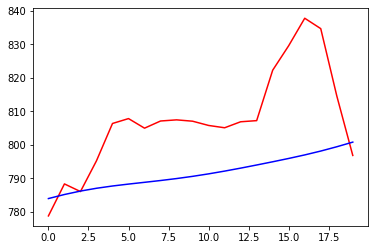

In [ ]:
plt.plot(real_stock_price,color="red",label="real_stock_price")
plt.plot(sc.inverse_transform(predicted_stock_price),color="blue",label="predicted_stock_price")